In [ ]:
# Import useful libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import load_breast_cancer #example dataset
from sklearn.metrics import confusion_matrix #confusion matrix
from sklearn.neighbors import KNeighborsClassifier #kNN
from sklearn.model_selection import train_test_split #split training test
import seaborn as sns
sns.set()

### kNN on 'breast cancer' dataset

The dataset classifies tumors into two categories (malignant and benign) and contains something like 30 features. We must encode categorical data for it to be interpreted by the model (i.e. `malignant = 0` and `benign = 1`).

In [ ]:
#import the data
breast_cancer = load_breast_cancer()

In [ ]:
# View this specific list
breast_cancer

Let's see how it works by selecting only 2 variables: `mean area` and `mean compactness`

In [ ]:
# Define the X dataset
X = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
X = X[['mean area', 'mean compactness']]
X.head()

In [ ]:
#define the y category - class
y = pd.Categorical.from_codes(breast_cancer.target, breast_cancer.target_names)
y

In [ ]:
# convert them to numbers
pd.get_dummies(y, drop_first=True)

In [ ]:
# prepqre the y for computing
y = pd.get_dummies(y, drop_first=True)
y.head()

In [ ]:
y

__Validation__

We need to put aside data to verify whether our model does a good job at classifying the data. By default, `train_test_split` sets aside `25%` of the samples in the original dataset for testing.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

The `sklearn library` has provided a layer of abstraction on top of Python. Therefore, in order to make use of the KNN algorithm, it’s sufficient to create an instance of KNeighborsClassifier. __By default, the KNeighborsClassifier looks for the 5 nearest neighbors__. We must explicitly tell the classifier to use __Euclidean distance__ for determining the proximity between neighboring points.

In [ ]:
# Prepare the kNN model
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train, y_train)

For the sake of clearness, we use build a model to predict whether a tumor is benign or not given its __mean compactness__ and __area__.

In [ ]:
# view the prediction on the test data
y_pred = knn.predict(X_test)

In [ ]:
y_pred

In [ ]:
# Plot the original data
sns.scatterplot(
    x='mean area',
    y='mean compactness',
    hue='benign',
    data=X_test.join(y_test, how='outer')
);

In [ ]:
# Plot the predicted data
plt.scatter(
    X_test['mean area'],
    X_test['mean compactness'],
    c=y_pred,
    cmap='coolwarm',
    alpha=0.7
);

Another way of evaluating our model is to compute the confusion matrix. The numbers on the diagonal of the __confusion matrix__ correspond to correct predictions whereas the others imply false positives and false negatives.

In [ ]:
# import functions for confusion matrix
from sklearn.metrics import confusion_matrix, plot_confusion_matrix # confusion matrix

In [ ]:
confusion_matrix(y_test, y_pred)

In [ ]:
plot_confusion_matrix(knn, X_test, y_test) 
plt.grid(False)
plt.show()

__Try to change k!__

### A routine to find the right k value

In [ ]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Assign colum names to the dataset
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

# Read dataset to pandas dataframe
dataset = pd.read_csv(url, names=names)

In [ ]:
dataset

In [ ]:
dataset.head()

In [ ]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 4].values

In [ ]:
#To create training and test splits, execute the following script:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

The above script splits the dataset into 80% train data and 20% test data. This means that out of total 150 records, the training set will contain 120 records and the test set contains 30 of those records.

In [ ]:
# Data pre-processing
from sklearn.preprocessing import StandardScaler # to make autoscaling
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train, y_train)

In [ ]:
y_pred = knn.predict(X_test)
y_pred

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [ ]:
plot_confusion_matrix(knn, X_train, y_train) 
plt.grid(False)
plt.show()

In [ ]:
plot_confusion_matrix(knn, X_test, y_test) 
plt.grid(False)
plt.show()

The results show that our KNN algorithm was able to classify all the 30 records in the test set with 100% accuracy, which is excellent. Although the algorithm performed very well with this dataset, don't expect the same results with all applications. As noted earlier, KNN doesn't always perform as well with high-dimensionality or categorical features.

#### Metrics: Sensitivity, Specificity and Accuracy

Calculate true positive, false positive, true negative, false negative for each class

In [ ]:
cmatrix = confusion_matrix(y_test,y_pred)
cmatrix

In [ ]:
# Prepare the matrix and data for tp, tn, fp and tn
tp = np.zeros(cmatrix.shape[0]) # true positive
fn = np.zeros(cmatrix.shape[0]) # false positive
fp = np.zeros(cmatrix.shape[0]) # false positive
tn = np.zeros(cmatrix.shape[0]) # true negative
tot = 0
for i in range(cmatrix.shape[0]):
    #print("--------")
    for j in range(cmatrix.shape[1]):
        #print("j vale ",j)
        if i==j:
            tp[i] = cmatrix[i,i]
        else:
            fn[i] = fn[i] + cmatrix[i,j]
            fp[i] = fp[i] + cmatrix[j,i]
        tot = tot + cmatrix[i,j]
for i in range(cmatrix.shape[0]):
    tn[i] = tot - tp[i] - fn[i] - fp[i]
    #print("tn:",tn[i])

In [ ]:
tp

In [ ]:
for i in range(cmatrix.shape[0]):
    print("True positive for the class",i,"are",tp[i])

In [ ]:
for i in range(cmatrix.shape[0]):
    print("False negative for the class",i,"are",fn[i])
for i in range(cmatrix.shape[0]):
    print("False positive for the class",i,"are",fp[i])
for i in range(cmatrix.shape[0]):
    print("True negative for the class",i,"are",tn[i])

Evaluate Sensitivity, Specificity and Accuracy for each class.

In [ ]:
for i in range(cmatrix.shape[0]):
    sens = tp[i]/(tp[i]+fn[i])
    spec = tn[i]/(tn[i]+fp[i])
    acc = (tp[i]+tn[i])/(tp[i]+tn[i]+fp[i]+fn[i])
    print("The sensitivity for the class",i,"is:",sens)
    print("The specificity for the class",i,"is:",spec)
    print("The accuracy for the class",i,"is:",acc)

__Comparing Error Rate with the k Value__

In the training and prediction section we said that there is no way to know beforehand which value of k that yields the best results in the first go. We randomly chose 5 as the k value and it just happen to result in 100% accuracy.

One way to help you find the best value of k is to plot the graph of k value and the corresponding error rate for the dataset.

In this section, we will plot the mean error for the predicted values of test set for all the k values between 1 and 40.

In [ ]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i, metric='euclidean')
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate k Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

### Diamonds example

A data frame with 53940 rows and 10 variables:
price price in US dollars (\$326--\$18,823)
- carat - weight of the diamond (0.2--5.01)
- cut - quality of the cut (Fair, Good, Very Good, Premium, Ideal)
- color - diamond colour, from J (worst) to D (best)
- clarity - a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
- x - length in mm (0--10.74)
- y - width in mm (0--58.9)
- z - depth in mm (0--31.8)
- depth - total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43-79)
- table - width of top of diamond relative to widest point (43--95)

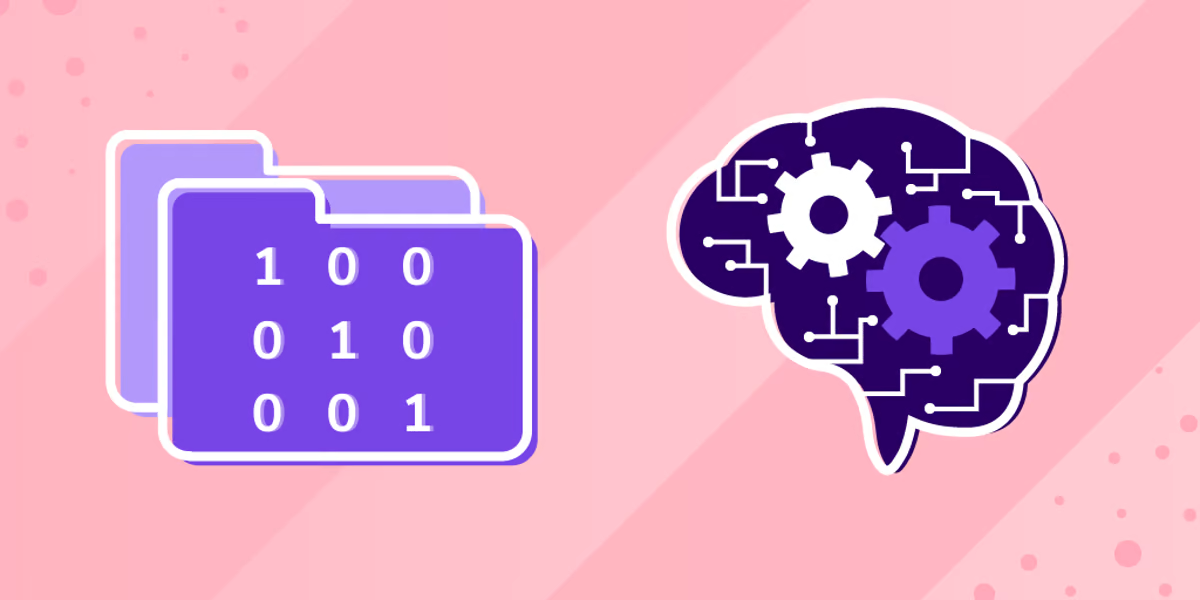

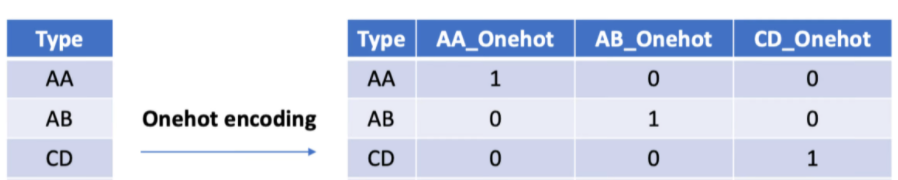

In [ ]:
import pandas as pd

diamonds = pd.read_csv(r"C:\Users\Gebruiker\Desktop\Desktop_Ghent\Notebooks\datasets\diamonds.csv")#.drop("Unnamed: 0", axis=1)
diamonds.head()

In [ ]:
diamonds.shape

In [ ]:
# View the numerical results
diamonds.describe().T.round(3)

In [ ]:
diamonds.cut.value_counts()

The dataset contains a mixture of numeric and categorical features

The target is ‘cut’, which has 5 classes: Ideal, Premium, Very Good, Good, and Fair (descending quality). We will encode the textual features with OneHotEncoder.

In [ ]:
diamonds.hist(figsize=(12, 8));

Price and carat show skewed distributions. 

We will use a logarithmic transformer to make them as normally distributed as possible. 

For the rest, autoscaling is enough

In [ ]:
from sklearn.model_selection import train_test_split

# Prepare the X
X = diamonds.drop("cut", axis=1)

X.head()

In [ ]:
# Prepare the y
y = diamonds["cut"].values.flatten()
y

In [ ]:
# Create train/test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=1, test_size=0.33, stratify=y
)

__StratifiedKFold__ is a variation of k-fold which returns stratified folds: each set contains approximately the same percentage of samples of each target class as the complete set.

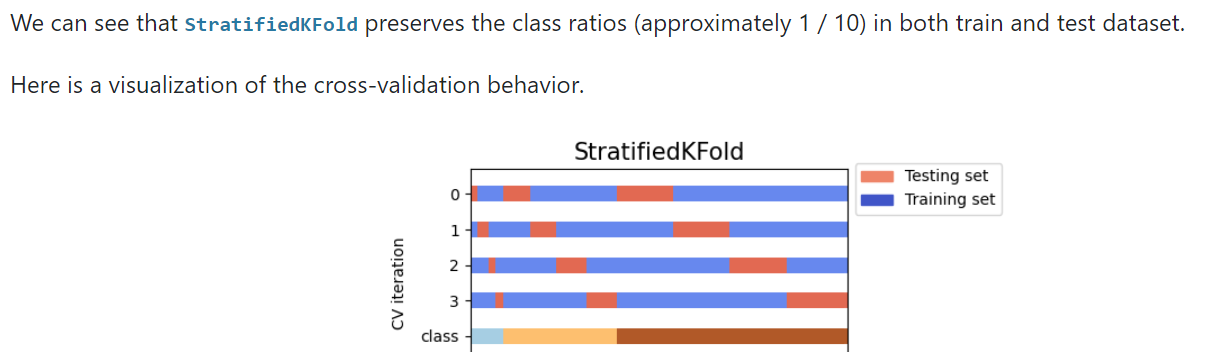

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline # to model using a certain flow-chart (pipeline)
from sklearn.preprocessing import (OneHotEncoder, PowerTransformer, StandardScaler)

In [ ]:
# Build categorical preprocessor
categorical_cols = X.select_dtypes(include="object").columns.to_list()
categorical_cols

In [ ]:
categorical_pipe = make_pipeline(OneHotEncoder(sparse=False, handle_unknown="ignore"))
categorical_pipe

In [ ]:
# Build numeric processor
to_log = ["price", "carat"]
to_scale = ["x", "y", "z", "depth", "table"]
numeric_pipe_1 = make_pipeline(PowerTransformer())
numeric_pipe_2 = make_pipeline(StandardScaler())

In [ ]:
# Full processor
full = ColumnTransformer(
    transformers=[
        ("categorical", categorical_pipe, categorical_cols),
        ("power_transform", numeric_pipe_1, to_log),
        ("standardization", numeric_pipe_2, to_scale),
    ]
)

In [ ]:
# Final pipeline combined with kNN
pipeline = Pipeline(
    steps=[
        ("preprocess", full),
        (
            "base",
            KNeighborsClassifier(n_neighbors=5, metric='euclidean'),
        ),
    ]
)

In [ ]:
# Fit
_ = pipeline.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

y_pred = pipeline.predict(X_test)

In [ ]:
# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(12, 8))
# Create the matrix
cm = confusion_matrix(y_test, y_pred)
cmp = ConfusionMatrixDisplay(cm, display_labels=pipeline.classes_)
plt.grid(False)
cmp.plot(ax=ax)

plt.show();

In [ ]:
from sklearn.metrics import roc_auc_score

# Generate membership scores with .predict_proba
y_pred_probs = pipeline.predict_proba(X_test)

# Calculate ROC_AUC
roc_auc_score(
    y_test, y_pred_probs, multi_class="ovr", average="weighted"
  )


In [ ]:
# GENERATE ROC_AUC SCORE FOR 'IDEAL' CLASS DIAMONDS

# Find the index of Ideal class diamonds
idx = np.where(pipeline.classes_ == "Ideal")[0][0]

# Don't have to set multiclass and average params
roc_auc_score(y_test == "Ideal", y_pred_probs[:, idx])


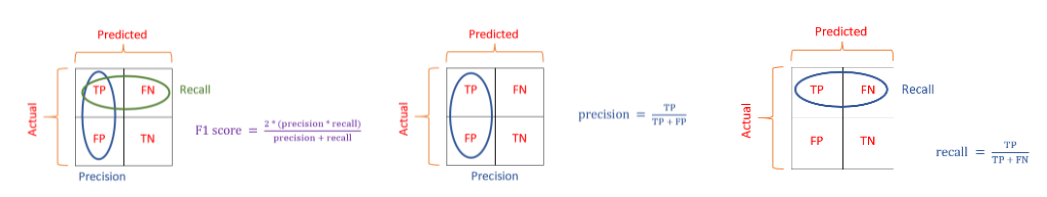

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

In [ ]:
cmatrix = confusion_matrix(y_test,y_pred)
cmatrix

In [ ]:
# Prepare the matrix and data for tp, tn, fp and tn
tp = np.zeros(cmatrix.shape[0]) # true positive
fn = np.zeros(cmatrix.shape[0]) # false positive
fp = np.zeros(cmatrix.shape[0]) # false positive
tn = np.zeros(cmatrix.shape[0]) # true negative
tot = 0
for i in range(cmatrix.shape[0]):
    #print("--------")
    for j in range(cmatrix.shape[1]):
        #print("j vale ",j)
        if i==j:
            tp[i] = cmatrix[i,i]
        else:
            fn[i] = fn[i] + cmatrix[i,j]
            fp[i] = fp[i] + cmatrix[j,i]
        tot = tot + cmatrix[i,j]
for i in range(cmatrix.shape[0]):
    tn[i] = tot - tp[i] - fn[i] - fp[i]
    #print("tn:",tn[i])

In [ ]:
tp

In [ ]:
for i in range(cmatrix.shape[0]):
    print("True positive for the class",i,"are",tp[i])

In [ ]:
for i in range(cmatrix.shape[0]):
    print("False negative for the class",i,"are",fn[i])
for i in range(cmatrix.shape[0]):
    print("False positive for the class",i,"are",fp[i])
for i in range(cmatrix.shape[0]):
    print("True negative for the class",i,"are",tn[i])

Evaluate Sensitivity, Specificity and Accuracy for each class.

In [ ]:
for i in range(cmatrix.shape[0]):
    sens = tp[i]/(tp[i]+fn[i])
    spec = tn[i]/(tn[i]+fp[i])
    acc = (tp[i]+tn[i])/(tp[i]+tn[i]+fp[i]+fn[i])
    print("The sensitivity for the class",i,"is:",sens)
    print("The specificity for the class",i,"is:",spec)
    print("The accuracy for the class",i,"is:",acc)